## 画像工学特論課題 5
### 移動平均と積算平均
<div style="text-align: right"> エネルギー環境システム専攻修士課程1年 26213167 </div>
<div style="text-align: right"> 和田拓弥 </div>

#### 1. 移動平均

与えられた「雑音を加えた信号」及び「真の信号」について，可視化したものを以下に示す．

In [1]:
# import library
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# read data
noisy_data_x, noisy_data_f = np.loadtxt("data/f_n1.dat", comments='#', unpack=True)
true_data_x, true_data_f = np.loadtxt("data/f_true.dat", comments='#', unpack=True)

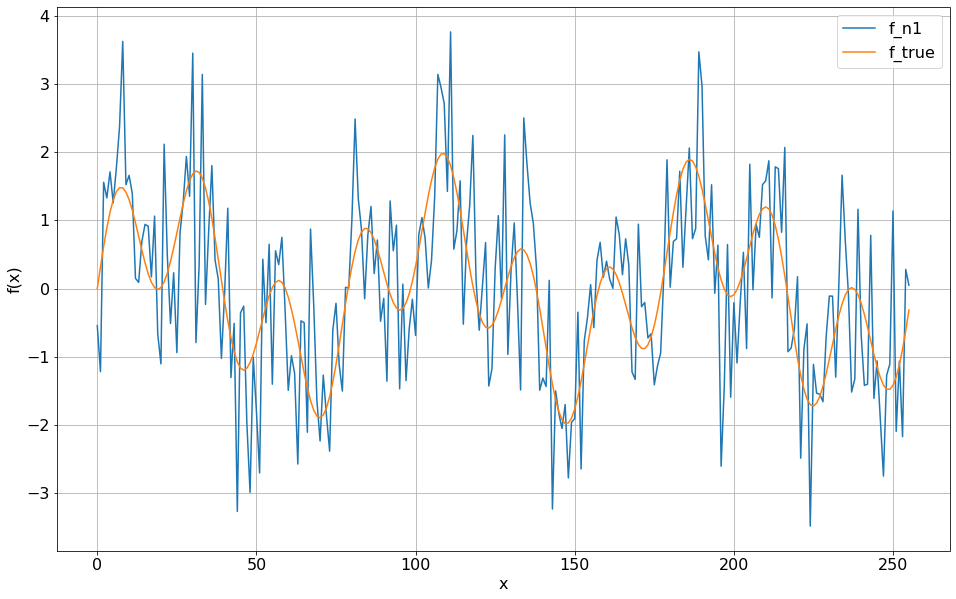

In [3]:
# show data
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("f(x)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.plot(noisy_data_x, noisy_data_f, label="f_n1")
plt.plot(true_data_x, true_data_f, label="f_true")

plt.grid(which="both")
plt.legend(loc='upper right', fontsize=16)

plt.show()

「雑音を加えた信号」$f$ について窓の幅が異なる，複数の単純移動平均を求める．移動平均の式について以下で表される．

$$
g_i = \frac{1}{N_m}\sum_{m}f_{i-m}
$$

簡単のため窓の幅 $N$ は奇数になるように設定し，$N = 3, 5, 7, ..., 99$ とした．またデータ範囲外のものは端点を参照する補間処理を行った．

In [4]:
def moving_average(f, n):
    g = np.zeros_like(f)

    for i in range(len(f)):
        for j in range(n):
            m = int(i - n / 2 + j)

            if m < 0:
                g[i] += f[0]
            elif m >= len(f):
                g[i] += f[-1]
            else:
                g[i] += f[m]

        g[i] /= n

    return g

次に「真の信号」$f'_i$ との残差 $d$ を以下の式により求めるものとした．

$$
d = \sqrt{\langle (g_i - f'_i)^2 \rangle _i}
$$

In [5]:
def residual(f, g):
    return np.sqrt(np.mean((f - g)**2))

移動平均を施した結果の一部を示す．

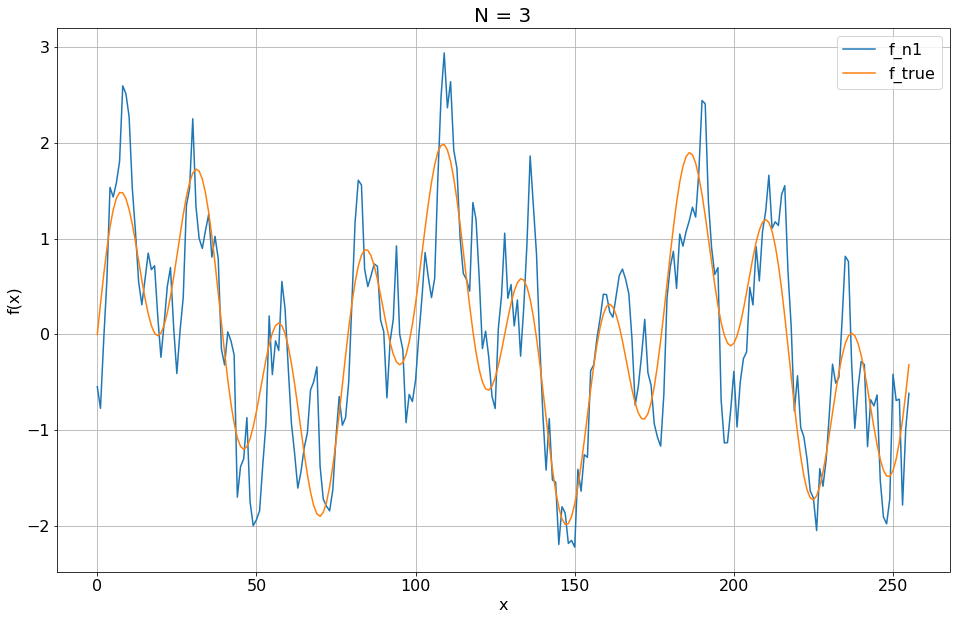

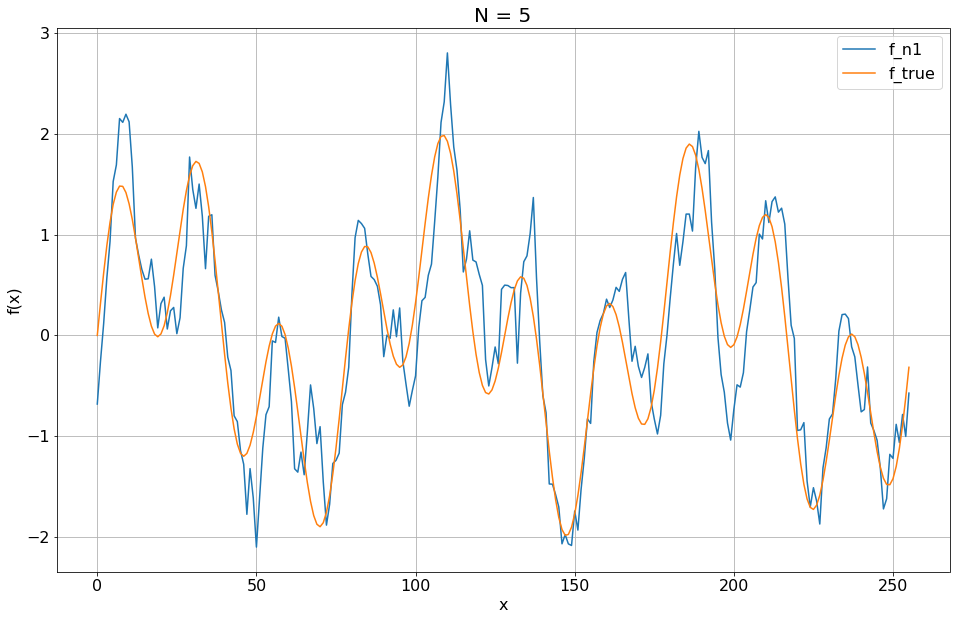

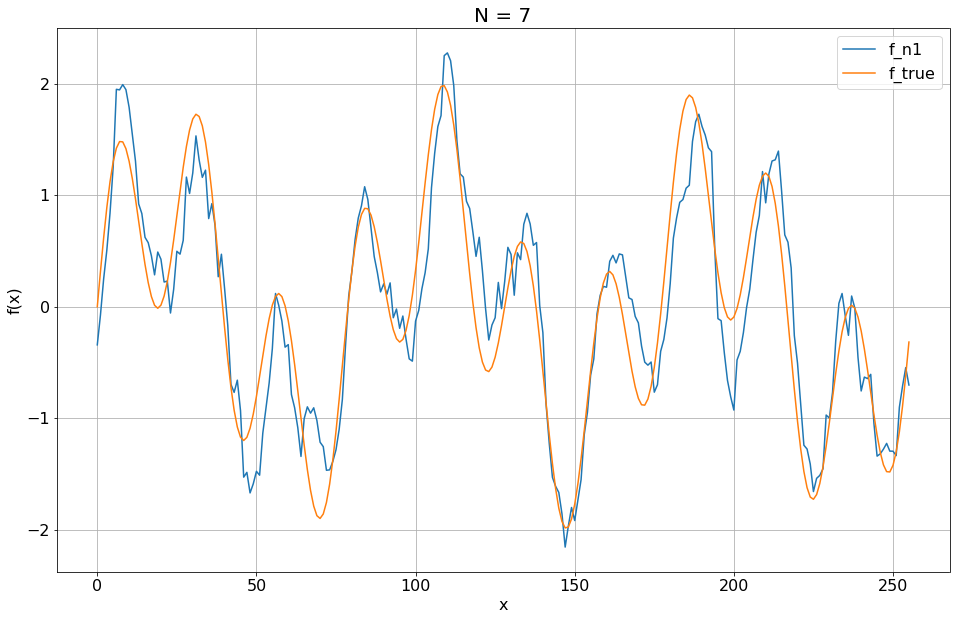

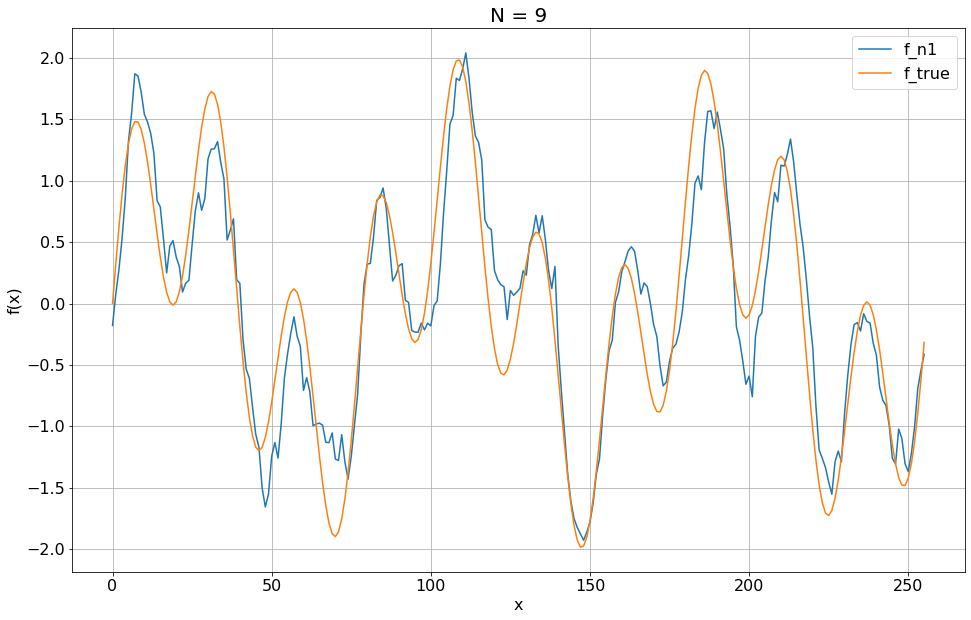

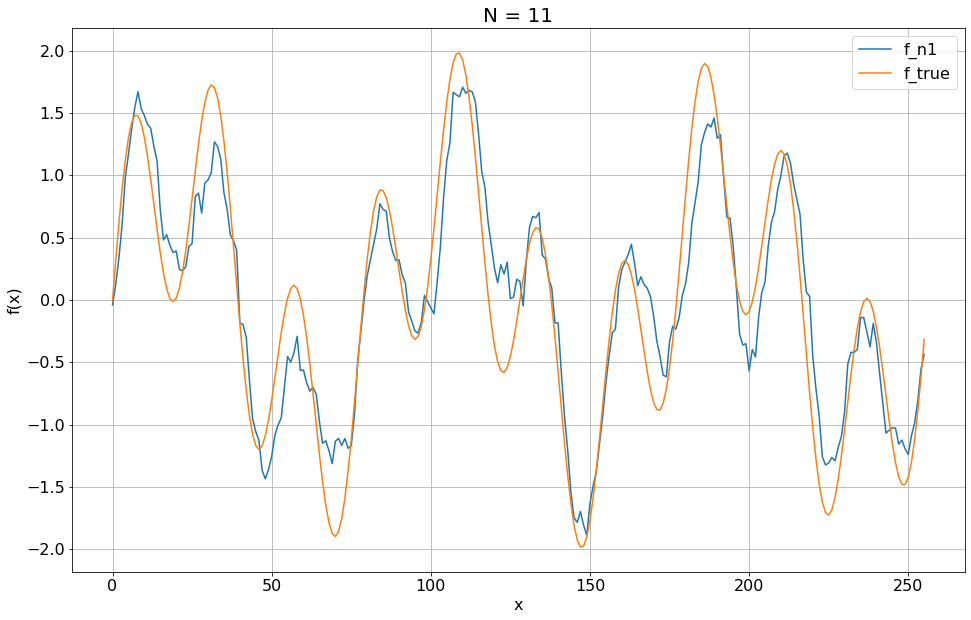

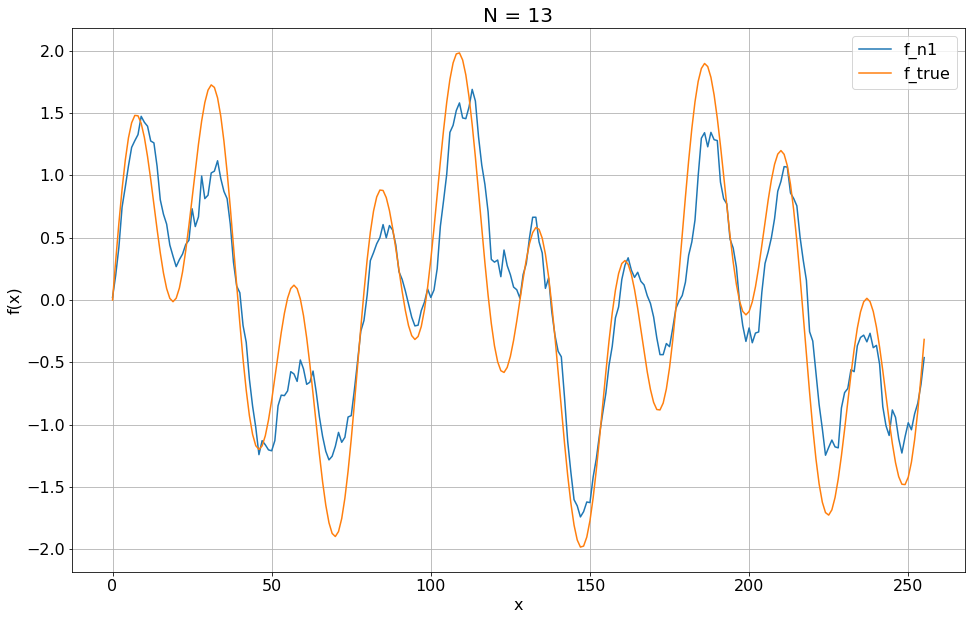

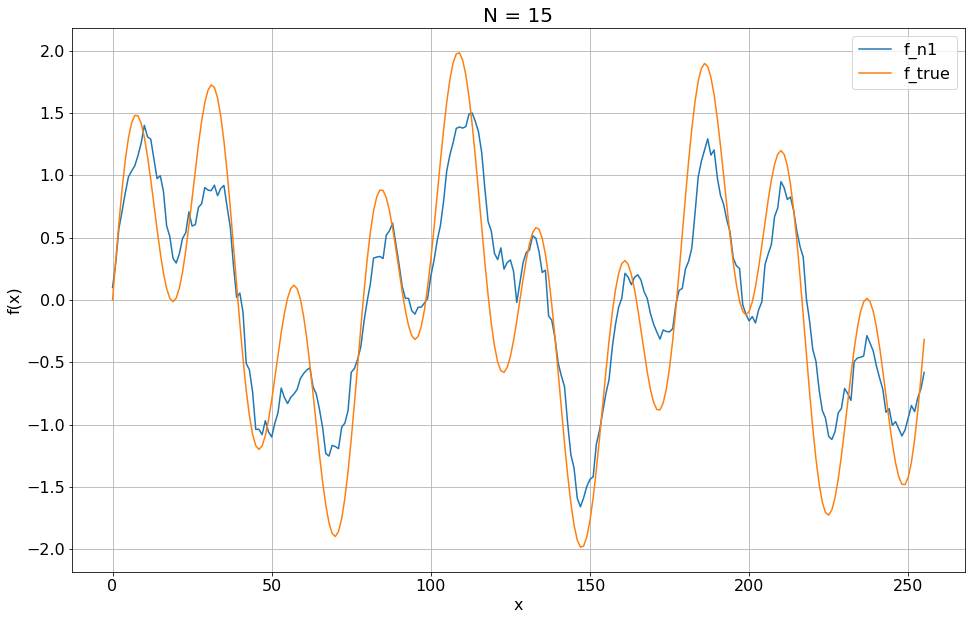

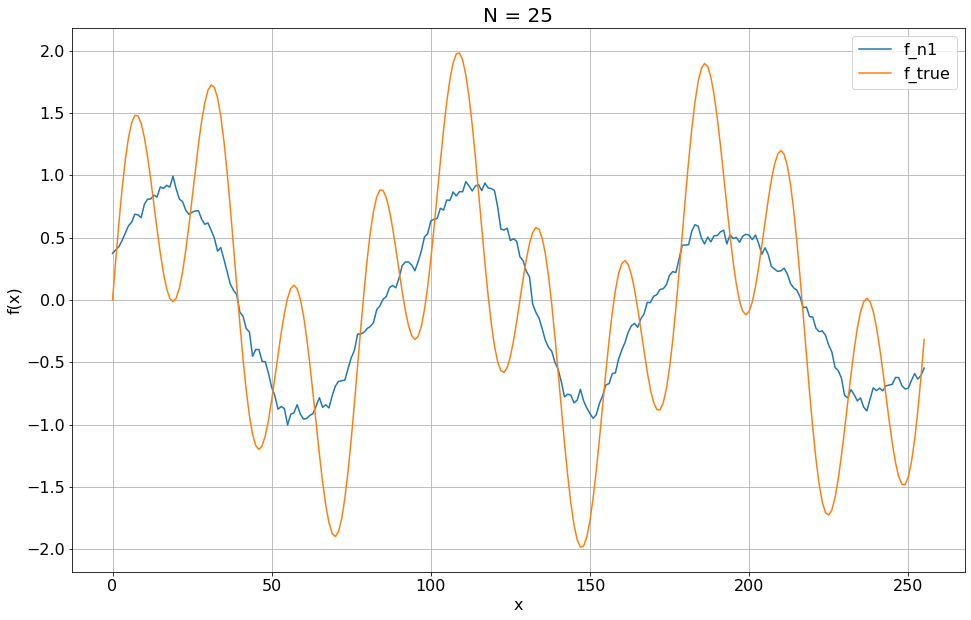

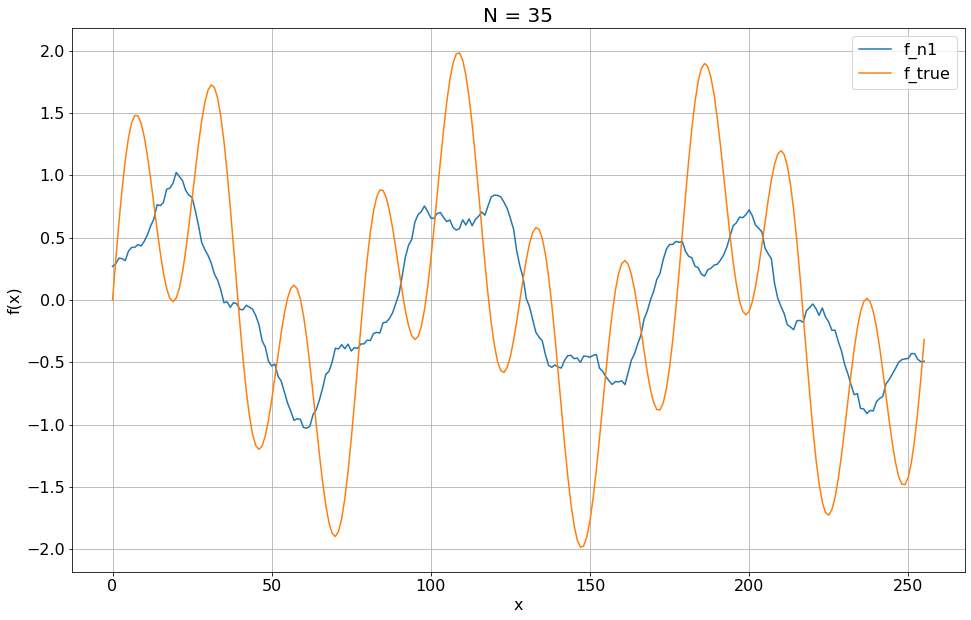

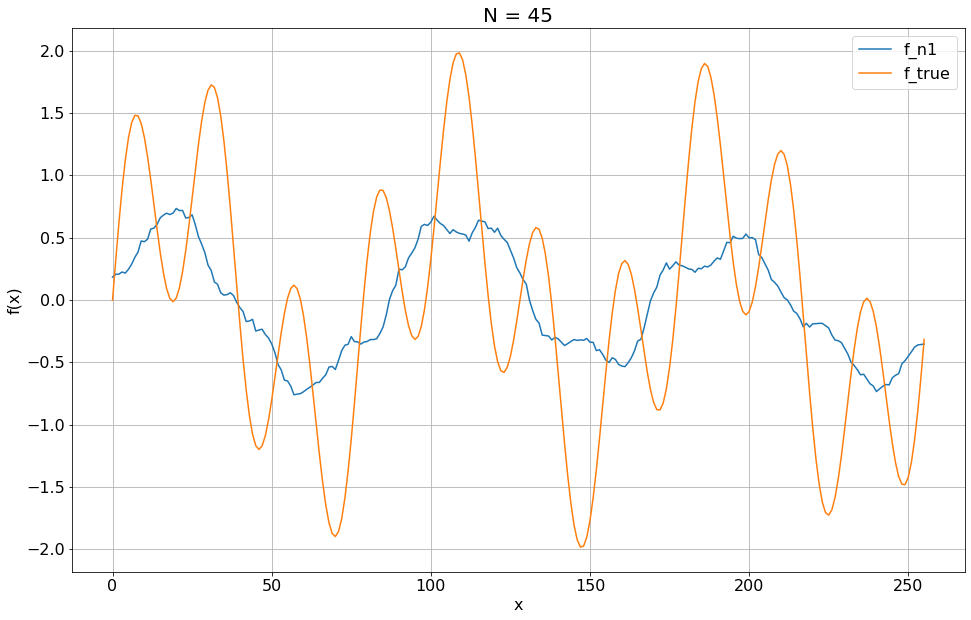

In [6]:
# show results
N_list = [3, 5, 7, 9, 11, 13, 15, 25, 35, 45]
res = []

for N in range(3, 100, 2):
    data_g = moving_average(noisy_data_f, N)
    res.append(residual(true_data_f, data_g))

    if N in N_list:
        fig, ax = plt.subplots(figsize=(16, 10))

        plt.title(f"N = {N}", fontsize=20)
        ax.set_xlabel("x", fontsize=16)
        ax.set_ylabel("f(x)", fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        plt.plot(noisy_data_x, data_g, label="f_n1")
        plt.plot(true_data_x, true_data_f, label="f_true")

        plt.grid(which="both")
        plt.legend(loc='upper right', fontsize=16)

        plt.show()

$N = 3$ から $N$ の増加に伴い，「真の信号」に近い波形が得られていく様子がうかがえた．一方で $N = 11$ あたりから徐々に「真の信号」から波形がずれていき，$N = 25$ 以降では波形が全く異なる結果が得られた．

次に「真の信号」に対する残差 $d$ についての結果を以下に示す．

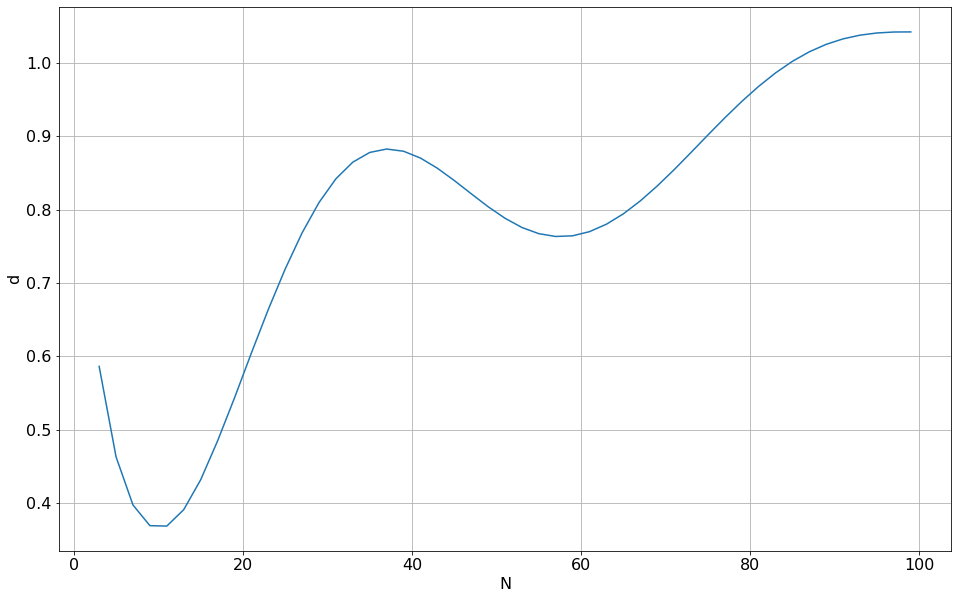

In [7]:
# show res result
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("N", fontsize=16)
ax.set_ylabel("d", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.plot([i for i in range(3, 100, 2)], res)

plt.grid(which="both")

plt.show()

グラフからやはり $N = 11$ にて残差が最小となる結果が得られ，$N = 11$ 以降は残差が増大することが明らかである．

ここで窓の幅と移動平均の結果についての考察を行う．先述の通り，$N$ の増大に伴い残差は小さくなる傾向を示す一方で，$N = 11$ 以降は「真の信号」とは異なる結果が得られた．これについて今回移動平均は，白色ノイズを低減させることを目的として行ったが，窓の幅を大きくした結果，もとの信号自体を平滑化してしまったと考えられる．実際「真の信号」の波長はグラフから25前後であり，これは大きく波形が異なってしまった結果と一致する．故に移動平均はむやみに行うものではなく，もとの信号についておおよその波形等を把握した上で適切に行うことが必要である．

#### 2. 複数データの積算平均

与えられた真の信号が同じであり，白色ノイズのみが異なる16の測定データについて，可視化したものを以下に示す．

In [8]:
# read data
n_data_x, n_data_f = [0]*16, [0]*16

for i in range(16):
    n_data_x[i], n_data_f[i] = np.loadtxt(f"data/f_n{i+1}.dat", comments='#', unpack=True)

true_data_x, true_data_f = np.loadtxt("data/f_true.dat", comments='#', unpack=True)

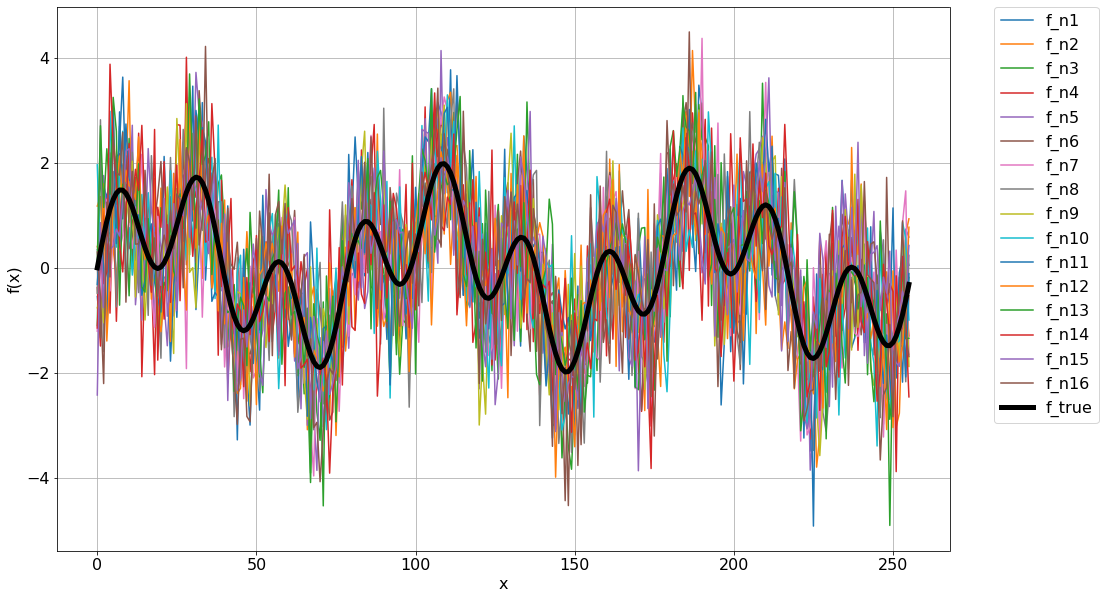

In [9]:
# show data
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("f(x)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(16):
    plt.plot(n_data_x[i], n_data_f[i], label=f"f_n{i+1}")
plt.plot(true_data_x, true_data_f, label="f_true", c='k', linewidth=5)

plt.grid(which="both")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)

plt.show()

これらのデータについて以下の式で表される積算平均を求める．

$$
\langle\langle y_i \rangle\rangle = \frac{1}{16}\sum_{k=1}^{16}y_i^{(k)}
$$

In [10]:
def integrate_average(f_list):
    return np.mean(f_list, axis=0)

積算平均を行った結果について以下に示す．

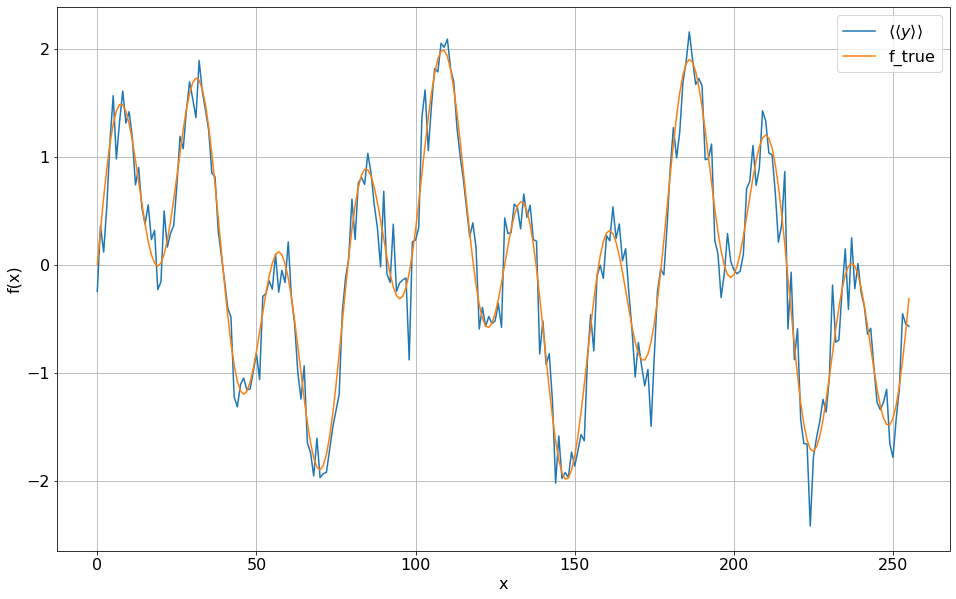

In [11]:
# show data
data_y = integrate_average(n_data_f)

fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("f(x)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.plot(true_data_x, data_y, label=r"$\langle\langle y \rangle\rangle$")
plt.plot(true_data_x, true_data_f, label="f_true")

plt.grid(which="both")
plt.legend(fontsize=16)

plt.show()

グラフから多少のノイズは残りつつも，「真の信号」の特徴をよく表している様子がうかがえた．

最後に移動平均の結果と積算平均の結果について比較する．今回最も残差の小さい結果が得られた，$N = 11$ における移動平均の残差と，積算平均についての残差の比較を行う．

In [12]:
data_g = moving_average(noisy_data_f, 11)

print(f"移動平均: d = {residual(true_data_f, data_g):.4f}")
print(f"積算平均: d = {residual(true_data_f, data_y):.4f}")

移動平均: d = 0.3688
積算平均: d = 0.2367


上記の結果より，積算平均のほうが残差が小さいことから，積算平均を用いる方が白色ノイズの低減に大きく寄与することが分かった．
